In [15]:
import pandas as pd
%matplotlib inline
import numpy as np

In [16]:
from pathlib import Path
csvpath = Path('../Resources/amazon.csv')
df = pd.read_csv(csvpath, parse_dates=True, index_col='Date')

In [17]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Diff
Date,,,,,,,
2009-01-02,51.349998,54.529999,51.070000,54.360001,54.360001,7296400,3.080002
2009-01-05,55.730000,55.740002,53.029999,54.060001,54.060001,9509800,-0.300000
2009-01-06,54.549999,58.220001,53.750000,57.360001,57.360001,11080100,3.300000
2009-01-07,56.290001,56.950001,55.349998,56.200001,56.200001,7942700,-1.160000
2009-01-08,54.990002,57.320000,54.580002,57.160000,57.160000,6577900,0.959999


<AxesSubplot:xlabel='Date'>

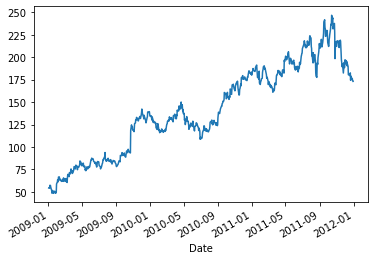

In [18]:
df.Close.plot()

In [19]:
# Apply the Augmented Dickey-Fuller test to determine if the above is stationary
# p-value <= .05 means it is stationary

from statsmodels.tsa.stattools import adfuller
results = adfuller(df.Close)

print('ADF Statistic: %f' % results[0])
print('p-value: %f' % results[1])
print('Critical Values:')
for key, value in results[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.664892
p-value: 0.449286
Critical Values:
	1%: -3.439
	5%: -2.865
	10%: -2.569


# Non-Stationary to Stationary Techniques

### Technique 1: Applying a Percent Change

In [22]:
# Convert to stationary data by taking the `pct_change` of the Closing prices.
df['Returns'] = df.Close.pct_change()

In [23]:
# Drop the NaNs created by the pct_change function
df = df.dropna()

<AxesSubplot:xlabel='Date'>

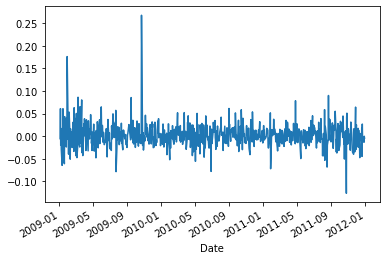

In [24]:
# Plot the returns as a line chart. 
# You should no longer see the upward trend in the data
df.Returns.plot()

In [25]:
results = adfuller(df.Returns)

print('ADF Statistic: %f' % results[0])
print('p-value: %f' % results[1])
print('Critical Values:')
for key, value in results[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -20.081316
p-value: 0.000000
Critical Values:
	1%: -3.439
	5%: -2.865
	10%: -2.569


### Technique 2: Applying a Diff

In [26]:
# Subtract the upward trend for the closing prices using the `diff()` function
df['Diff'] = df.Close.diff()

C:\Users\email\Anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [27]:
# Drop the NaNs created from the diff function
df = df.dropna()

<AxesSubplot:xlabel='Date'>

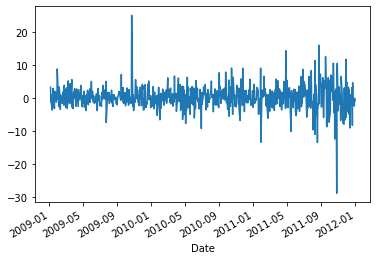

In [28]:
# Plot the 
df.Diff.plot()

In [29]:
results = adfuller(df.Diff)

print('ADF Statistic: %f' % results[0])
print('p-value: %f' % results[1])
print('Critical Values:')
for key, value in results[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -27.760807
p-value: 0.000000
Critical Values:
	1%: -3.439
	5%: -2.865
	10%: -2.569
